 # Ma511 FINAL PROJECT
 - BLIDI Nayel
 - DESCHAMPS Léo
 - POISSONNET Clément

# Preamble

This project is divided into multiple parts, where each tries a different approach in order to reach the best accuracy results on the testing dataset. Please note that all but the first part can be executed independantly, thus the **PART I has to be compiled at every kernel start/restart**.  
<br>
Also note that this work is using a personal deep learning library, that is provided as a copy alongside this file, and can also be publically accessed remotely from the following link:  
<br>
https://github.com/Nayel-Blidi/PyYel  
<br>
This will allow us to quickly deploy a data processing pipeline, as well as implement some simple network architechtures, to rapidely get a grasp of the complexity of the problem.

##### **PART I - Exploratory Data Analysis** *(All cells must be executed once)*
- Datapoints shapes and plotting
- train&test keys dataframing
- json cleaning and dataframing 
- main csv dataframing  

Where:  
- **0** corresponds to the **Abies** species,
- **1** corresponds to the **Fagus** species,
- **2** corresponds to the **Larix** species.
- **3** corresponds to the **Picea** species.
- **4** corresponds to the **Quercus** species.
- **5** corresponds to the **Pseudotsuga** species.
- **6** corresponds to the **Pinus** species.
- **7** corresponds to the **Acer** species.
- **8** corresponds to the **Betula** species.
- **9** corresponds to the **Fraxinus** species.
- **10** corresponds to the **Cleared** species.
- **11** corresponds to the **Alnus** species.
- **12** corresponds to the **Populus** species.
- **13** corresponds to the **Prunus** species.
- **14** corresponds to the **Tilia** species.
##### **PART II - S1 Dataset** *(Execution is non-mandatory)*
- Tests a simple Convolutional Neural Network on the S1 dataset

##### **PART III - S2 Dataset** *(Execution is non-mandatory)*
- Tests a simple Convolutional Neural Network on the S2 dataset

##### **PART IV - S1 & S2 Merged Datasets** *(Execution is non-mandatory)*
- Tests a simple Convolutional Neural Network on both S1 and S2 merged datasets

##### **PART V - Fully connected NN architecture** *(Execution is non-mandatory)*
- Tests a simple deep Multi-Perceptron Neural Network (S1 & S2)

##### **PART VI - Transfer Learning** *(Execution is non-mandatory)*
- Tests a deeply complex Convolutional Neural Network (S1 & S2)



A synthesis of all the part's results can be found below (best results, S1 & S2 merged) (all are detailled inside of their respective parts):  
| Architecture | Epochs | Training Accuracy (%) | Testing Accuracy (%) |
|--------------|--------|-----------------------|----------------------|
| CNN          | 500    | 63 | 60 |
| CNN          | 1000   | **68** | **62** |
| LayeredNN    | 500   | 32 | 27 |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tiff
import json

from tqdm import tqdm

import torch
import torch.nn as nn
import torchvision.models as models

import os

main_path = os.path.abspath("") + "/"
s1_path = main_path + "s1_60m/"
s2_path = main_path + "s2_60m/"
labels_path = main_path + "labels/"
output_path = main_path + "Models/"

# PART I - Exploratory Data Analysis
Let's first try to understand the data we are facing, by plotting and printing some of its aspect, begining with the datapoints.

In [ ]:
s1_file_list = [file for file in os.listdir(s1_path) if file.endswith(".tif")]
s2_file_list = [file for file in os.listdir(s2_path) if file.endswith(".tif")]

arr = np.array(tiff.imread(s1_path + s1_file_list[0]))
print(arr.shape)
print(arr[0])
arr = np.array(tiff.imread(s2_path + s2_file_list[0]))
print(arr.shape)
print(arr[0])


(6, 6, 3)
[[ -5.335223    -6.2998185    0.8468852 ]
 [ -3.9937298   -5.6843624    0.7025818 ]
 [ -3.9333224   -7.61211      0.51671904]
 [ -3.6292474  -11.363376     0.3193811 ]
 [ -5.431843   -11.382256     0.47722024]
 [ -6.261381   -11.427894     0.54790336]]
(6, 6, 12)
[[  97  176   89 1536  330 1166 1487 1677  546  208  112 1625]
 [  93  199   79 1585  314 1144 1474 1664  539  210   96 1624]
 [  86  199   87 1605  307 1194 1537 1652  484  180  107 1630]
 [  65  189   73 1581  311 1196 1540 1642  471  177  101 1628]
 [  90  220  104 1696  317 1268 1582 1726  493  194  117 1634]
 [ 101  220   98 1721  313 1253 1564 1704  464  168   99 1643]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


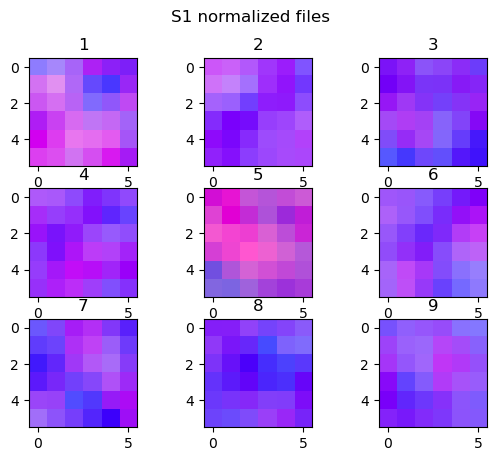

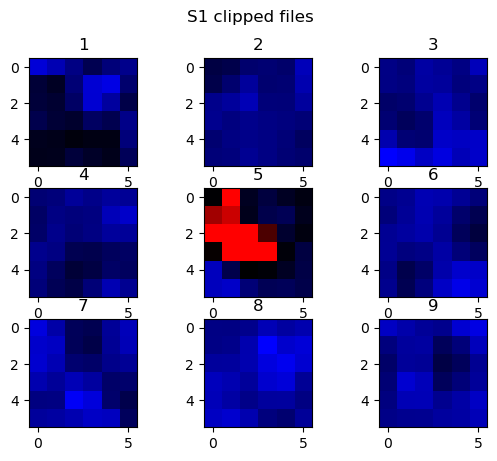

In [3]:
plt.subplots(3, 3)
plt.suptitle("S1 normalized files")
for image_idx, image in enumerate(s1_file_list[0:9]):
    plt.subplot(3, 3, image_idx+1)
    arr = tiff.imread(s1_path + image)
    normalized_array = (arr - arr.min()) / (arr.max() - arr.min())
    plt.imshow(normalized_array)
    plt.title(image_idx+1)

plt.subplots(3, 3)
plt.suptitle("S1 clipped files")
for image_idx, image in enumerate(s1_file_list[0:9]):
    plt.subplot(3, 3, image_idx+1)
    arr = tiff.imread(s1_path + image)
    plt.imshow(arr)
    plt.title(image_idx+1)

Now, let's try to load the labels and the training and testing file repartition.

In [4]:
df_train_filenames = pd.read_csv(main_path+"train_filenames.lst", header=None, names=["Filenames"])
df_train_filenames[["Is_trainable"]] = 1
display(df_train_filenames.head())
display(df_train_filenames.describe().loc["count"])
df_test_filenames = pd.read_csv(main_path+"test_filenames.lst", header=None, names=["Filenames"])
df_test_filenames[["Is_trainable"]] = 0
display(df_test_filenames.head())
display(df_test_filenames.describe().loc["count"])

,Filenames,Is_trainable
0,Abies_alba_0_2545_WEFL_NLF.tif,1
1,Abies_alba_1_1005_WEFL_NLF.tif,1
2,Abies_alba_1_322558_BI_NLF.tif,1
3,Abies_alba_2_113_WEFL_NLF.tif,1
4,Abies_alba_2_1184_WEFL_NLF.tif,1


Is_trainable    45337.0
Name: count, dtype: float64

,Filenames,Is_trainable
0,Abies_alba_2_14344_BI_NLF.tif,0
1,Abies_alba_2_1440_WEFL_NLF.tif,0
2,Abies_alba_2_2481_WEFL_NLF.tif,0
3,Abies_alba_2_3075_WEFL_NLF.tif,0
4,Abies_alba_2_3244_WEFL_NLF.tif,0


Is_trainable    5044.0
Name: count, dtype: float64

The two datasets count of entries ad up to 45337 + 5044 = **50381**. Below is the reading of the json file containing the repartition of species among each datapoint. These samples sum up to **50380**, meaning one datapoint is missing between these two corresponding datapoints, which is a rather insignificant issue.

In [5]:
with open(labels_path+"TreeSatBA_v9_60m_multi_labels.json", 'r') as json_file:
    data = json.load(json_file)

for idx, key in enumerate(data.keys()):
    print(data[key])
    if idx >=6: break


[['Pseudotsuga', 1.0]]
[['Abies', 0.93771], ['Larix', 0.06229]]
[['Acer', 0.93266], ['Picea', 0.06734]]
[['Betula', 0.94366]]
[['Cleared', 1.0]]
[['Fagus', 0.94659], ['Picea', 0.05341]]
[['Pseudotsuga', 0.38587], ['Picea', 0.34596], ['Quercus', 0.26817]]


As shown in the small sample above, we are promptly met with an issue: some datapoints are not featuring only one 'pure' target.  
Because we are not facing a dataset with boundary boxes representation, let's consider these datapoints are training examples of worse quality, as they are 'corrupted' by other classes. By retreiving only the most represented target and storing it in a dataframe, we 'purify' our dataset, and we'll then be able to decide until wich 'purity' threshold a datapoint can be considered 'good' or 'corrupted'.

In [6]:
labels_list = []
for idx, key in enumerate(data.keys()):
    labels_list.append([key, *max(data[key], key=lambda x: x[1])])

df_json = pd.DataFrame(labels_list, columns=["Filenames", "Species", "Percentages"])
display(df_json.head())
display(df_json.describe().loc["count"])

print(pd.unique(df_json["Species"]))

,Filenames,Species,Percentages
0,Pseudotsuga_menziesii_3_78528_WEFL_NLF.tif,Pseudotsuga,1.00000
1,Abies_alba_3_834_WEFL_NLF.tif,Abies,0.93771
2,Acer_pseudoplatanus_1_7587_WEFL_NLF.tif,Acer,0.93266
3,Betula_spec._3_16038_WEFL_NLF.tif,Betula,0.94366
4,Cleared_0_23454_WEFL_NLF.tif,Cleared,1.00000


Percentages    50380.0
Name: count, dtype: float64

['Pseudotsuga' 'Abies' 'Acer' 'Betula' 'Cleared' 'Fagus' 'Fraxinus'
 'Pinus' 'Larix' 'Quercus' 'Picea' 'Alnus' 'Populus' 'Prunus' 'Tilia']


Let's now unify our train & test datasets and our targets & percentage json.

In [7]:
df_train_test = pd.concat([df_train_filenames, df_test_filenames], axis=0)
display(df_train_test.describe().loc["count"])

# We drop the execentary value (and all non matching data if there is any) (inner join)
df_train_test = df_train_test[df_train_test['Filenames'].isin(df_json['Filenames'])]

display(df_train_test.head())
display(df_json.head())

Is_trainable    50381.0
Name: count, dtype: float64

,Filenames,Is_trainable
0,Abies_alba_0_2545_WEFL_NLF.tif,1
1,Abies_alba_1_1005_WEFL_NLF.tif,1
2,Abies_alba_1_322558_BI_NLF.tif,1
3,Abies_alba_2_113_WEFL_NLF.tif,1
4,Abies_alba_2_1184_WEFL_NLF.tif,1


,Filenames,Species,Percentages
0,Pseudotsuga_menziesii_3_78528_WEFL_NLF.tif,Pseudotsuga,1.00000
1,Abies_alba_3_834_WEFL_NLF.tif,Abies,0.93771
2,Acer_pseudoplatanus_1_7587_WEFL_NLF.tif,Acer,0.93266
3,Betula_spec._3_16038_WEFL_NLF.tif,Betula,0.94366
4,Cleared_0_23454_WEFL_NLF.tif,Cleared,1.00000


The merged array featuring all the information needed to reference the data that will be used during this study is referenced into a single dataframe, where:
- **0** corresponds to the **Abies** species,
- **1** corresponds to the **Fagus** species,
- **2** corresponds to the **Larix** species.
- **3** corresponds to the **Picea** species.
- **4** corresponds to the **Quercus** species.
- **5** corresponds to the **Pseudotsuga** species.
- **6** corresponds to the **Pinus** species.
- **7** corresponds to the **Acer** species.
- **8** corresponds to the **Betula** species.
- **9** corresponds to the **Fraxinus** species.
- **10** corresponds to the **Cleared** species.
- **11** corresponds to the **Alnus** species.
- **12** corresponds to the **Populus** species.
- **13** corresponds to the **Prunus** species.
- **14** corresponds to the **Tilia** species.

In [8]:
df_main = pd.merge(df_train_test, df_json, on='Filenames')

targets_encoder = {'Abies':0, 'Fagus':1, 'Larix':2, 
                   'Picea':3, 'Quercus':4, 'Pseudotsuga':5, 
                   'Pinus':6, 'Acer':7, 'Betula':8, 'Fraxinus':9,
                    'Cleared':10, 'Alnus':11, 'Populus':12, 
                    'Prunus':13, 'Tilia':14}

df_main['Class'] = df_main['Species'].map(targets_encoder)

df_main.to_csv(main_path+"Datapoints.csv")
print(pd.unique(df_main["Species"]))

['Abies' 'Fagus' 'Larix' 'Picea' 'Quercus' 'Pseudotsuga' 'Pinus' 'Acer'
 'Betula' 'Fraxinus' 'Cleared' 'Alnus' 'Populus' 'Prunus' 'Tilia']


In [27]:
df_main = pd.read_csv(main_path+"Datapoints.csv")
# condition = df_main['Percentages'] >= 0.6
# df_main = df_main[condition]

df_training = df_main[df_main["Is_trainable"] == 1][["Filenames", "Class"]].dropna().reset_index(drop=True)
display(df_training.describe().loc["count"])

df_testing = df_main[df_main["Is_trainable"] == 0][["Filenames", "Class"]].dropna().reset_index(drop=True)
display(df_testing.describe().loc["count"])


Class    45337.0
Name: count, dtype: float64

Class    5043.0
Name: count, dtype: float64

# PART II - S1 dataset

Now, let's create our four arrays: X_train, X_test, Y_train, Y_test

In [ ]:
# Training examples (~90sec)
X_train = [tiff.imread(s1_path + file) for file in df_training["Filenames"].values.tolist()]
X_train = np.stack(X_train)
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_train = np.transpose(X_train, (0, 3, 1, 2))
Y_train = np.array([df_training["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_train = np.squeeze(np.eye(15)[Y_train])

# Testing examples (~20sec)
X_test = [tiff.imread(s1_path + file) for file in df_testing["Filenames"].tolist()]
X_test = np.stack(X_test)
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_test = np.transpose(X_test, (0, 3, 1, 2))
Y_test = np.array([df_testing["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_test = np.squeeze(np.eye(15)[Y_test])

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


I will now be using a personal deep learning library, that is provided as a copy alongside this file, and can also be publically accessed remotely using the following link:  
https://github.com/Nayel-Blidi/PyYel  

This will allow us to quickly deploy a data processing pipeline, as well as implement some simple network architechtures, to test the complexity of the problem.

In [29]:
%load_ext autoreload
%autoreload 2
from PyYel.datapoint import Datapoint

# Dummy class object, as we will overwrite the default pipeline in this usecase
datapoint_class = Datapoint(X=X_train, y=Y_train)
datapoint_class.splitOverwrite(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
datapoint_class.tensorize()
datapoint_class.normalize()
datapoint_class.dataload()
datapoint_class._datapointShapes(display=True)

train_dataloader, test_dataloader = datapoint_class.getDataloaders()
kwargs = datapoint_class.getKwargs()
kwargs["input_size"] = 6
print(kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> batch_size, in_channels, height, width, output_size:
	 45337 	 3 	 6 	 6 	 15
{'batch_size': 45337, 'in_channels': 3, 'height': 6, 'width': 6, 'input_size': 6, 'output_size': 15}


We will now implement a simple CNN to see how the datapoints react.

100%|██████████| 500/500 [11:18<00:00,  1.36s/it]


Finished training, CNNs1_500e.pth saved at epoch 499
Final loss: 2.1226119995117188


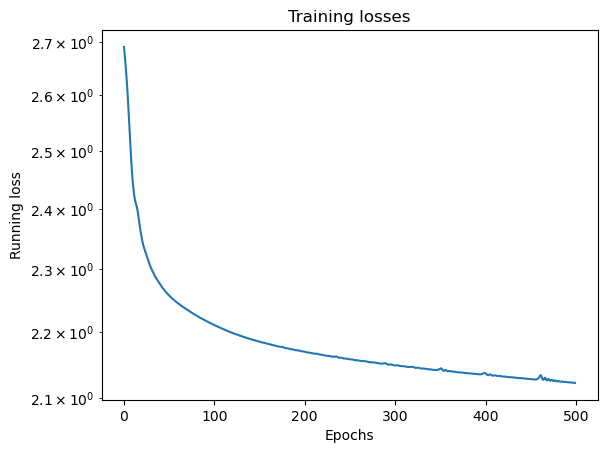

In [30]:
from PyYel.NNmodels import CNN
from PyYel.compiler import Trainer, Tester, Loader

model = CNN(filters=16, hidden_layers=64, **kwargs)
model_name = "CNNs1"
num_epochs = 500

trainer_class = Trainer(model=model, model_name=model_name, num_epochs=num_epochs,
                        input_path="", output_path=output_path,
                        train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
trainer_class.runPipeline()

All the trained models are save as .pth files inside of the /Models/ folder. Below is a testing cell, that loads the weights of the given model name, and then test it on the two datasets defined above in the Datapoint class.

In [32]:
model_loader = Loader(model_name="CNNs1_500e.pth", input_path=output_path, filters=16, hidden_layers=64, **kwargs)
model = model_loader.getModel()

tester_class = Tester(model=model,
                    input_path="", output_path=output_path,
                    train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
tester_class.runPipeline()

CNNs1_500e.pth weights loaded.
testing accuracy: 0.2844
training accuracy: 0.302115


Here is a summary of all the Part II tests (s1 dataset):
___
- CNNs1_100 / Full training dataset : 27% accuracy in training and 26% testing
- CNNs1_500 / Full training dataset : 30% accuracy in training and 28% in testing  
___
- CNNs1_100 / Percentage > 0.6 training dataset : 66% accuracy in training and testing
___

# PART III - S2 Dataset
Let's repeat all the Part II steps, but using the S2 dataset instead, and see how much the results might be improved.

In [ ]:
# Training examples (~5min)
X_train = [tiff.imread(s2_path + file) for file in df_training["Filenames"].values.tolist()]
X_train = np.stack(X_train, dtype=np.float32)
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_train = np.transpose(X_train, (0, 3, 1, 2))
Y_train = np.array([df_training["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_train = np.squeeze(np.eye(15)[Y_train])

# Testing examples (~1min)
X_test = [tiff.imread(s2_path + file) for file in df_testing["Filenames"].tolist()]
X_test = np.stack(X_test, dtype=np.float32)
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_test = np.transpose(X_test, (0, 3, 1, 2))
Y_test = np.array([df_testing["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_test = np.squeeze(np.eye(15)[Y_test])

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


In [ ]:
from PyYel.datapoint import Datapoint

# Dummy class object, as we will overwrite the default pipeline in this usecase
datapoint_class = Datapoint(X=X_train, y=Y_train)
datapoint_class.splitOverwrite(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
datapoint_class.tensorize()
datapoint_class.normalize()
datapoint_class.dataload()
datapoint_class._datapointShapes(display=True)

train_dataloader, test_dataloader = datapoint_class.getDataloaders()
kwargs = datapoint_class.getKwargs()
kwargs["input_size"] = 6
print(kwargs)

> batch_size, in_channels, height, width, output_size:
	 45337 	 12 	 6 	 6 	 15
{'batch_size': 45337, 'in_channels': 12, 'height': 6, 'width': 6, 'input_size': 6, 'output_size': 15}


100%|██████████| 500/500 [13:09<00:00,  1.58s/it]


Finished training, CNNs2_500e.pth saved at epoch 499
Final loss: 1.1751729249954224


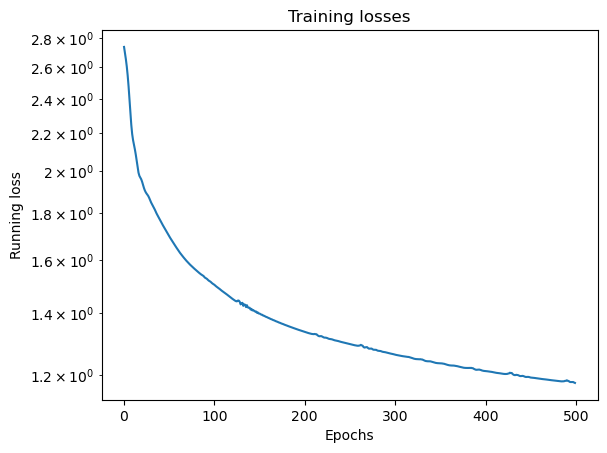

In [30]:
from PyYel.NNmodels import CNN
from PyYel.compiler import Trainer, Tester, Loader

model = CNN(filters=16, hidden_layers=64, **kwargs)
model_name = "CNNs2"
num_epochs = 500

trainer_class = Trainer(model=model, model_name=model_name, num_epochs=num_epochs,
                        input_path="", output_path=output_path,
                        train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
trainer_class.runPipeline()

In [ ]:
model_loader = Loader(model_name="CNNs2_500e.pth", input_path=output_path, filters=16, hidden_layers=64, **kwargs)
model = model_loader.getModel()

tester_class = Tester(model=model,
                    input_path="", output_path=output_path,
                    train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
tester_class.runPipeline()

Here is a summary of all the Part III tests (s2 dataset):
___
- CNNs2_100 / Full training dataset : 54% accuracy in training and 52% testing
- CNNs2_500 / Full training dataset : 59% accuracy in training and 63% in testing
___
- CNNs2_100 / Percentage > 0.6 training dataset : 88% accuracy in training and testing
___
These results show no improvement between considering only the 'pure' data or when training over the whole dataset. 

# PART IV - S1 and S2 merged
The next step is naturally to try to regroup the datasets from the two S1 and S2 stellites, in an attempt to reach a better accuracy than what has been shown so far above. 

In [35]:
# Training examples (~3min)
X_train_s1 = [tiff.imread(s1_path + file) for file in df_training["Filenames"].values.tolist()]
X_train_s1 = np.stack(X_train_s1, dtype=np.float32)
X_train_s2 = [tiff.imread(s2_path + file) for file in df_training["Filenames"].values.tolist()]
X_train_s2 = np.stack(X_train_s2, dtype=np.float32)
X_train = np.concatenate([X_train_s1, X_train_s2], axis=3) # Concatenate alongside the soon-to-be in_channels dimension
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_train = np.transpose(X_train, (0, 3, 1, 2))
Y_train = np.array([df_training["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_train = np.squeeze(np.eye(15)[Y_train])

# Testing examples (~30sec)
X_test_s1 = [tiff.imread(s1_path + file) for file in df_testing["Filenames"].tolist()]
X_test_s1 = np.stack(X_test_s1, dtype=np.float32)
X_test_s2 = [tiff.imread(s2_path + file) for file in df_testing["Filenames"].tolist()]
X_test_s2 = np.stack(X_test_s2, dtype=np.float32)
X_test = np.concatenate([X_test_s1, X_test_s2], axis=3) # Concatenate alongside the soon-to-be in_channels dimension
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_test = np.transpose(X_test, (0, 3, 1, 2))
Y_test = np.array([df_testing["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_test = np.squeeze(np.eye(15)[Y_test])

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(45337, 15, 6, 6) (5043, 15, 6, 6) (45337, 15) (5043, 15)


In [36]:
from PyYel.datapoint import Datapoint

# Dummy class object, as we will overwrite the default pipeline in this usecase
datapoint_class = Datapoint(X=X_train, y=Y_train)
datapoint_class.splitOverwrite(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
datapoint_class.tensorize()
datapoint_class.normalize()
datapoint_class.dataload()
datapoint_class._datapointShapes(display=True)

train_dataloader, test_dataloader = datapoint_class.getDataloaders()
kwargs = datapoint_class.getKwargs()
kwargs["input_size"] = 6
print(kwargs)

> batch_size, in_channels, height, width, output_size:
	 45337 	 15 	 6 	 6 	 15
{'batch_size': 45337, 'in_channels': 15, 'height': 6, 'width': 6, 'input_size': 6, 'output_size': 15}


100%|██████████| 1000/1000 [26:15<00:00,  1.58s/it]


Finished training, CNNs1s2_1000e.pth saved at epoch 997
Final loss: 1.0112621784210205


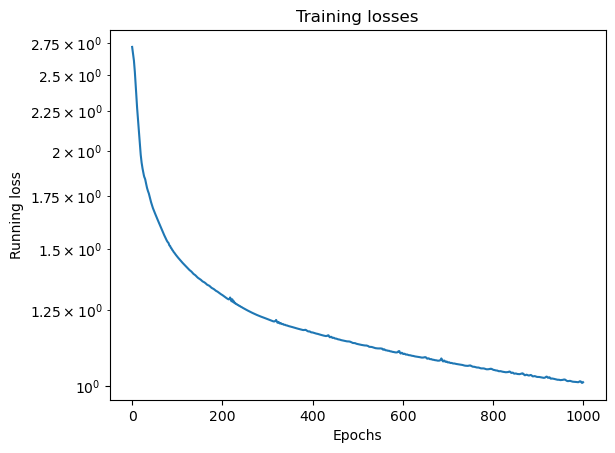

In [37]:
from PyYel.NNmodels import CNN
from PyYel.compiler import Trainer, Tester, Loader

model = CNN(filters=16, hidden_layers=64, **kwargs)
model_name = "CNNs1s2"
num_epochs = 1000

trainer_class = Trainer(model=model, model_name=model_name, num_epochs=num_epochs,
                        input_path="", output_path=output_path,
                        train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
trainer_class.runPipeline()

In [39]:
model_loader = Loader(model_name="CNNs1s2_1000e.pth", input_path=output_path, filters=16, hidden_layers=64, **kwargs)
model = model_loader.getModel()

tester_class = Tester(model=model,
                    input_path="", output_path=output_path,
                    train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
tester_class.runPipeline()

CNNs1s2_1000e.pth weights loaded.
testing accuracy: 0.6211
training accuracy: 0.676511


Here is a summary of all the Part IV tests (s1 & s2 datasets):
___
- CNNs1s2_100 / Full training dataset : 54% accuracy in training and 52% in testing
- CNNs1s2_500 / Full training dataset : 63% accuracy in training and 60% in testing
- CNNs1s2_1000 / Full training dataset : 68% accuracy in training and 62% in testing
___
- CNNs1s2_100 / Percentage > 0.6 training dataset : 91% accuracy in training and 89% in testing
___
These results show no improvement between considering only the 'pure' data or when training over the whole dataset. 

# PART V - Fully connected NN architecture
The Convolution Neural Networks seem to be reaching a maximum efficiency, but considering the rather small amount of features, let's try a different approach.

In [10]:
# Training examples (~40sec)
X_train_s1 = [tiff.imread(s1_path + file) for file in df_training["Filenames"].values.tolist()]
X_train_s1 = np.stack(X_train_s1, dtype=np.float32)
X_train_s2 = [tiff.imread(s2_path + file) for file in df_training["Filenames"].values.tolist()]
X_train_s2 = np.stack(X_train_s2, dtype=np.float32)
X_train = np.concatenate([X_train_s1, X_train_s2], axis=3) # Concatenate alongside the soon-to-be in_channels dimension
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_train = np.transpose(X_train, (0, 3, 1, 2))
Y_train = np.array([df_training["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_train = np.squeeze(np.eye(3)[Y_train])

# Testing examples (~15sec)
X_test_s1 = [tiff.imread(s1_path + file) for file in df_testing["Filenames"].tolist()]
X_test_s1 = np.stack(X_test_s1, dtype=np.float32)
X_test_s2 = [tiff.imread(s2_path + file) for file in df_testing["Filenames"].tolist()]
X_test_s2 = np.stack(X_test_s2, dtype=np.float32)
X_test = np.concatenate([X_test_s1, X_test_s2], axis=3) # Concatenate alongside the soon-to-be in_channels dimension
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_test = np.transpose(X_test, (0, 3, 1, 2))
Y_test = np.array([df_testing["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_test = np.squeeze(np.eye(3)[Y_test])

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(9577, 540) (1074, 540) (9577, 3) (1074, 3)


In [41]:
# Fattening
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(45337, 540) (5043, 540) (45337, 15) (5043, 15)


In [42]:
from PyYel.datapoint import Datapoint

# Dummy class object, as we will overwrite the default pipeline in this usecase
datapoint_class = Datapoint(X=X_train, y=Y_train)
datapoint_class.splitOverwrite(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
datapoint_class.tensorize()
datapoint_class.normalize()
datapoint_class.dataload()
datapoint_class._datapointShapes(display=True)

train_dataloader, test_dataloader = datapoint_class.getDataloaders()
kwargs = datapoint_class.getKwargs()
print(kwargs)

> batch_size, in_channels, height, width, output_size:
	 45337 	 540 	 1 	 1 	 15
{'batch_size': 45337, 'in_channels': 540, 'height': 1, 'width': 1, 'input_size': 540, 'output_size': 15}


100%|██████████| 500/500 [07:22<00:00,  1.13it/s]


Finished training, LayeredNNs1s2_500e.pth saved at epoch 493
Final loss: 0.7725270390510559


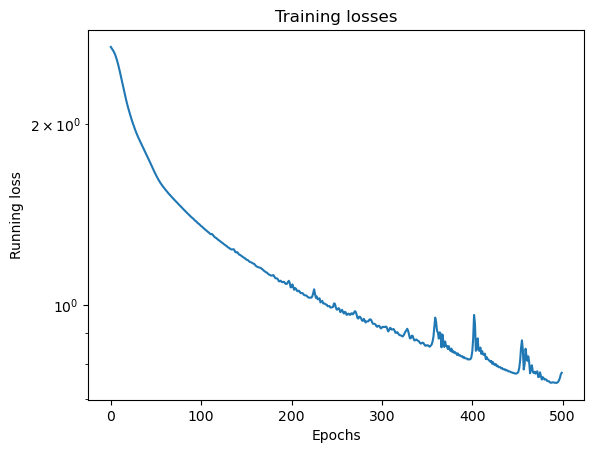

In [47]:
from PyYel.NNmodels import LayeredNN
from PyYel.compiler import Trainer, Tester, Loader

model = LayeredNN(hidden_layers=256, **kwargs)
model_name = "LayeredNNs1s2"
num_epochs = 500

trainer_class = Trainer(model=model, model_name=model_name, num_epochs=num_epochs,
                        input_path="", output_path=output_path, lr=0.001,
                        train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
trainer_class.runPipeline()

In [49]:
model_loader = Loader(model_name="LayeredNNs1s2_500e.pth", input_path=output_path, hidden_layers=256, **kwargs)
model = model_loader.getModel()

tester_class = Tester(model=model,
                    input_path="", output_path=output_path,
                    train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
tester_class.runPipeline()

LayeredNNs1s2_500e.pth weights loaded.
testing accuracy: 0.2669
training accuracy: 0.315085


Here is a summary of all the Part V tests (s1 & s2 datasets):
___
- LayeredNNs1s2_100 / Full training dataset : 29% accuracy in training and 28% in testing
- LayeredNNs1s2_500 / Full training dataset : 32% accuracy in training and 27% in testing


# PART VI - Transfer learning
In the following part, we'll try to implement a pretrained neural network. Because of the complexity and the cost of these operations, we will only train it over 3 classes. All the previous were also trained on only 3 classes for comparison :  
- **0** corresponds to the **Abies** species,
- **1** corresponds to the **Fagus** species,
- **5** corresponds to the **Pseudotsuga** species.
  
With the following results :    
| Architecture | Epochs | Training Accuracy (%) | Testing Accuracy (%) |
|--------------|--------|-----------------------|----------------------|
| CNN          | 500    | 97 | 90 |
| CNN          | 1000   | **99** | **90** |
| LayeredNN    | 1000   | 100 | 88 |
| SparseLayeredNN (*) | 1000 | 99 | 89 |
| VGG          | 100     | 79 | 78 |
| LSTM (*)        | 1000   | 100 | 85 |
  
*\* These networks were not presented here due to the lack of new relevant results they provided*

It seems like so far, all the models above have been struggling to reach a testing accuracy above 90%. To try and overcome it, we'll now implement some pretrained models, by freezing some weights and retraining some layers to adapt it to the current problem. This technique is called 'transfer learning'.  

In [20]:
df_main = pd.read_csv(main_path+"Datapoints.csv")

# df_training = df_main[df_main["Is_trainable"] == 1][["Filenames", "Class"]].dropna().reset_index(drop=True)
df_training = df_main[(df_main["Is_trainable"] == 1) & (df_main["Class"].isin([0, 1, 5]))][["Filenames", "Class"]].dropna().reset_index(drop=True)
display(df_training.describe().loc["count"])

# df_testing = df_main[df_main["Is_trainable"] == 0][["Filenames", "Class"]].dropna().reset_index(drop=True)
df_testing = df_main[(df_main["Is_trainable"] == 0) & (df_main["Class"].isin([0, 1, 5]))][["Filenames", "Class"]].dropna().reset_index(drop=True)
display(df_testing.describe().loc["count"])

Class    9577.0
Name: count, dtype: float64

Class    1074.0
Name: count, dtype: float64

In [21]:
# Training examples (~30sec)
X_train_s1 = [tiff.imread(s1_path + file) for file in df_training["Filenames"].values.tolist()]
X_train_s1 = np.stack(X_train_s1, dtype=np.float32)
X_train_s2 = [tiff.imread(s2_path + file) for file in df_training["Filenames"].values.tolist()]
X_train_s2 = np.stack(X_train_s2, dtype=np.float32)
X_train = np.concatenate([X_train_s1, X_train_s2], axis=3) # Concatenate alongside the soon-to-be in_channels dimension
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_train = np.transpose(X_train, (0, 3, 1, 2))
Y_train = np.array([df_training["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_train[Y_train == 5] = 2
Y_train = np.squeeze(np.eye(3)[Y_train])

# Testing examples (~10sec)
X_test_s1 = [tiff.imread(s1_path + file) for file in df_testing["Filenames"].tolist()]
X_test_s1 = np.stack(X_test_s1, dtype=np.float32)
X_test_s2 = [tiff.imread(s2_path + file) for file in df_testing["Filenames"].tolist()]
X_test_s2 = np.stack(X_test_s2, dtype=np.float32)
X_test = np.concatenate([X_test_s1, X_test_s2], axis=3) # Concatenate alongside the soon-to-be in_channels dimension
# Dims are swapped in the default torch input order: (batch_size, in_channels, height, width)
X_test = np.transpose(X_test, (0, 3, 1, 2))
Y_test = np.array([df_testing["Class"].to_numpy()], dtype=int).T
# One-hot encoding
Y_test[Y_test == 5] = 2
Y_test = np.squeeze(np.eye(3)[Y_test])

# Iterpolation (~10sec)
from scipy.ndimage import zoom
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
zoom_factors = (1, 1, 4, 4)  # (in_channels, height, width)
X_train = zoom(X_train, zoom_factors, order=1, mode='nearest')
X_test = zoom(X_test, zoom_factors, order=1, mode='nearest')
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

%load_ext autoreload
%autoreload 2
from PyYel.datapoint import Datapoint

# Dummy class object, as we will overwrite the default pipeline in this usecase
datapoint_class = Datapoint(X=X_train, y=Y_train)
datapoint_class.splitOverwrite(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
datapoint_class.tensorize()
datapoint_class.normalize()
datapoint_class.dataload()
datapoint_class._datapointShapes(display=True)

train_dataloader, test_dataloader = datapoint_class.getDataloaders()
kwargs = datapoint_class.getKwargs()

(9577, 15, 6, 6) (1074, 15, 6, 6) (9577, 3) (1074, 3)
(9577, 15, 24, 24) (1074, 15, 24, 24) (9577, 3) (1074, 3)
> batch_size, in_channels, height, width, output_size:
	 9577 	 15 	 24 	 24 	 3


In [24]:
import torch
import torch.nn as nn
import torchvision.models as models

class ModifiedPretrainedVGG(nn.Module):
    def __init__(self, num_classes=3, in_channels=15):
        super(ModifiedPretrainedVGG, self).__init__()

        # Pre-trained VGG model
        pretrained_vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

        # Modify the first convolutional layer to accept input
        pretrained_vgg.features[0] = nn.Conv2d(
            in_channels, 64, kernel_size=3, stride=1, padding=1
        )

        # Remove the last pooling layer to adapt to smaller input size
        pretrained_vgg.features = pretrained_vgg.features[:-1]

        # Classifier layers (head) is replaced by a new one
        pretrained_vgg.classifier = nn.Sequential(nn.Linear(512, 256),  
                                                    nn.ReLU(inplace=True),
                                                    nn.Linear(256, num_classes)
                                                )
        
        # The deep feature layers are frozen
        for param in pretrained_vgg.features.parameters():
            param.requires_grad = False    
        # The first input layer is retrained
        pretrained_vgg.features[0].requires_grad = True

        self.features = pretrained_vgg.features
        self.classifier = pretrained_vgg.classifier

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x



ModifiedPretrainedVGG(
  (features): Sequential(
    (0): Conv2d(15, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, pa

100%|██████████| 10/10 [04:34<00:00, 27.46s/it]


Finished training, VGGs1s2_10e.pth saved at epoch 9
Final loss: 0.7194603085517883


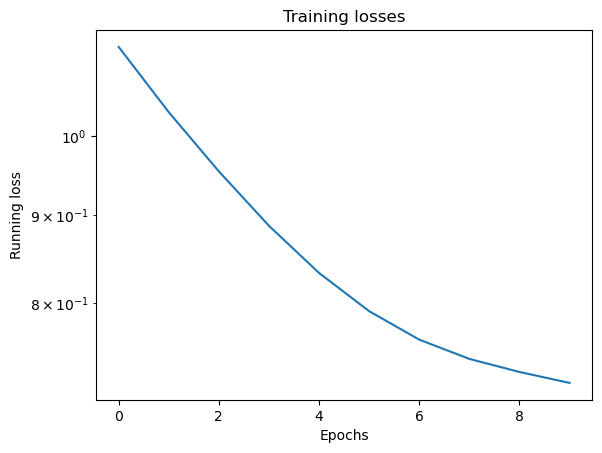

In [23]:
from PyYel.compiler import Trainer, Tester, Loader

# Create an instance of the modified pre-trained VGG
num_classes = 3
input_size = (15, 24, 24)
model = ModifiedPretrainedVGG(num_classes=num_classes, in_channels=input_size[0])

print(model)

model_name = "VGGs1s2"
num_epochs = 100

trainer_class = Trainer(model=model, model_name=model_name, num_epochs=num_epochs,
                        input_path="", output_path=output_path,
                        train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
trainer_class.runPipeline()


In [26]:
from PyYel.compiler import Trainer, Tester, Loader
import torch

num_classes = 3
input_size = (15, 24, 24)

model = ModifiedPretrainedVGG(num_classes=num_classes, in_channels=input_size[0])
model = torch.load(f"{output_path}/VGGs1s2_100e.pth")

tester_class = Tester(model=model,
                    input_path="", output_path=output_path,
                    train_dataloader=train_dataloader, test_dataloader=test_dataloader, **kwargs)
tester_class.runPipeline()

testing accuracy: 0.7840
training accuracy: 0.785632


Here is a summary of all the Part VI tests (s1 & s2 datasets) **(fully retrained NN)**:
___
- VGGs1s2_10e / Full training dataset : 65% accuracy in training and 65% in testing
- VGGs1s2_50e / Full training dataset : 80% accuracy in training and 79% in testing
___
- VGGs1s2_50e / Percentage > 0.6 dataset : 80% accuracy in training and 78% in testing
___

Here is a summary of all the Part VI tests (s1 & s2 datasets) **(Pretrained deep layers)**:
___
- VGGs1s2_10e / Full training dataset : 70% accuracy in training and 70% in testing
- VGGs1s2_100e / Full training dataset : 79% accuracy in training and 78% in testing
___
- VGGs1s2_50e / Percentage > 0.6 dataset : 80% accuracy in training and 78% in testing
___
